4. Perform a non-linear regression to predict China’s GDP from 1960 to 2014 from given features. Evaluate the quality of the model by computing relevant performance metrics, including the R² value. Generate and display a plot that compares the actual values to the predicted values (Actual vs Predicted) for both tasks. Dataset: china_gdp.csv

Optimized Parameters: a=0.1752, b=2021.3700, c=4.8272
R² Score: 0.9938


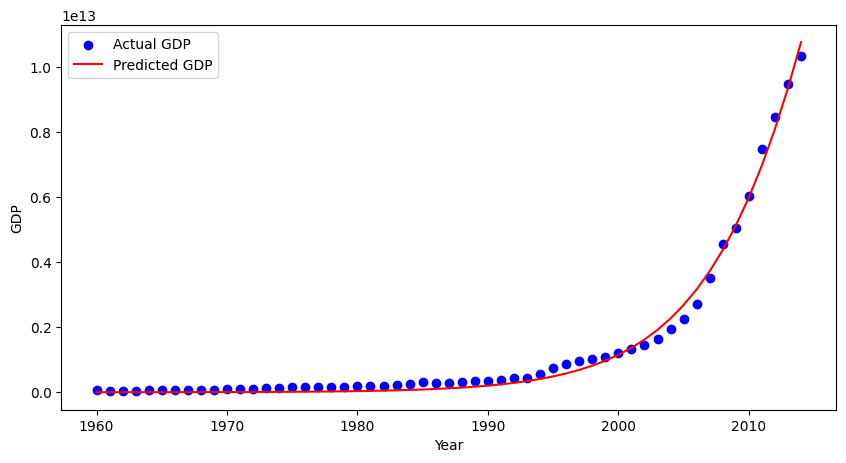

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv('china_gdp.csv')
years, gdp = df['Year'].values, df['Value'].values

# Normalize GDP
gdp_norm = gdp / np.max(gdp)

# Define logistic function
logistic = lambda x, a, b, c: c / (1 + np.exp(-a * (x - b)))

# Fit model
params, _ = curve_fit(logistic, years, gdp_norm, p0=[0.1, 2000, 1], maxfev=50000)
a, b, c = params

# Predict and denormalize
gdp_pred = logistic(years, a, b, c) * np.max(gdp)

# Evaluate
r2 = r2_score(gdp, gdp_pred)
print(f"Optimized Parameters: a={a:.4f}, b={b:.4f}, c={c:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot
plt.figure(figsize=(10,5))
plt.scatter(years, gdp, color='blue', label='Actual GDP')
plt.plot(years, gdp_pred, color='red', label='Predicted GDP')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.show()

The provided code performs **non-linear regression** using a **logistic growth function** to predict China's GDP from 1960 to 2014. Below is a step-by-step explanation of the code:

---

### **1. Import Required Libraries**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

- **`numpy` and `pandas`**: For numerical computations and data manipulation.
- **`matplotlib.pyplot`**: For data visualization.
- **`scipy.optimize.curve_fit`**: For fitting the logistic growth function to the data.
- **`sklearn.metrics.r2_score`**: To evaluate the model's performance using the R² score.

---

### **2. Load the Dataset**


In [3]:
df = pd.read_csv('china_gdp.csv')
years, gdp = df['Year'].values, df['Value'].values

- The dataset is loaded using `pandas.read_csv()`.
- **`years`**: Extracts the "Year" column as the feature.
- **`gdp`**: Extracts the "Value" column as the target (GDP values).

---

### **3. Normalize the GDP Values**


In [4]:
gdp_norm = gdp / np.max(gdp)

- The GDP values are normalized by dividing them by the maximum GDP value. This scales the data between 0 and 1, which helps in fitting the logistic function.

---

### **4. Define the Logistic Growth Function**


In [5]:
logistic = lambda x, a, b, c: c / (1 + np.exp(-a * (x - b)))

- The **logistic function** is defined as:
  \[
  f(x) = \frac{c}{1 + e^{-a(x - b)}}
  \]
  - **`a`**: Growth rate.
  - **`b`**: Midpoint (year where growth is fastest).
  - **`c`**: Maximum GDP value (carrying capacity).

---

### **5. Fit the Logistic Model**


In [6]:
params, _ = curve_fit(logistic, years, gdp_norm, p0=[0.1, 2000, 1], maxfev=50000)
a, b, c = params

- **`curve_fit`**: Fits the logistic function to the data.
  - **`years`**: Input feature (Year).
  - **`gdp_norm`**: Target variable (normalized GDP).
  - **`p0`**: Initial guesses for the parameters `[a, b, c]`.
  - **`maxfev`**: Maximum number of function evaluations (set to 50,000 to ensure convergence).
- **`params`**: Optimized parameters `[a, b, c]` for the logistic function.

---

### **6. Make Predictions**


In [7]:
gdp_pred = logistic(years, a, b, c) * np.max(gdp)

- The logistic function is used to predict GDP values for the given years.
- The predictions are **denormalized** by multiplying them by the maximum GDP value.

---

### **7. Evaluate the Model**


In [8]:
r2 = r2_score(gdp, gdp_pred)
print(f"Optimized Parameters: a={a:.4f}, b={b:.4f}, c={c:.4f}")
print(f"R² Score: {r2:.4f}")

Optimized Parameters: a=0.1752, b=2021.3700, c=4.8272
R² Score: 0.9938


- **`r2_score`**: Computes the R² score, which measures how well the model explains the variance in the data.
- The optimized parameters (`a`, `b`, `c`) and the R² score are printed.

---

### **8. Visualize the Results**


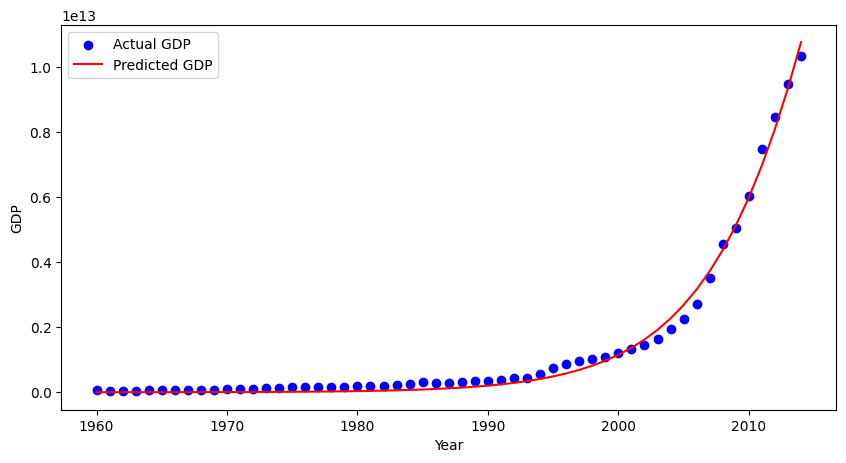

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(years, gdp, color='blue', label='Actual GDP')
plt.plot(years, gdp_pred, color='red', label='Predicted GDP')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.show()

- A scatter plot is created for the **actual GDP values** (blue points).
- The **predicted GDP values** (red line) are plotted on the same graph.
- This visualization shows how well the logistic model fits the data.

---

### **Key Outputs**
1. **Optimized Parameters**:
   - `a`: Growth rate.
   - `b`: Year of fastest growth.
   - `c`: Maximum GDP value.
2. **R² Score**:
   - Indicates the goodness of fit (closer to 1 is better).
3. **Plot**:
   - Compares actual vs predicted GDP values.

---

### **Summary**
- The code uses a **logistic growth function** to model China's GDP growth from 1960 to 2014.
- The model is trained using **non-linear regression** (`curve_fit`).
- The performance is evaluated using the **R² score**.
- A plot is generated to compare the actual and predicted GDP values, showing the model's fit.

Column Names in Dataset: Index(['Year', 'Value'], dtype='object')


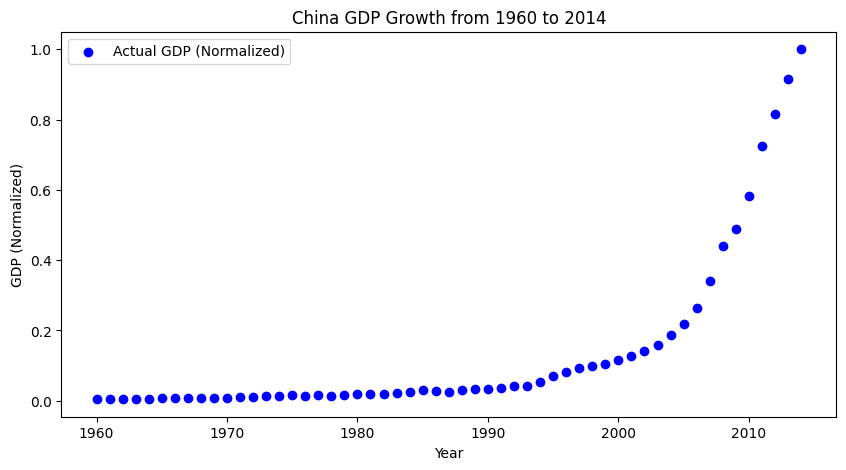

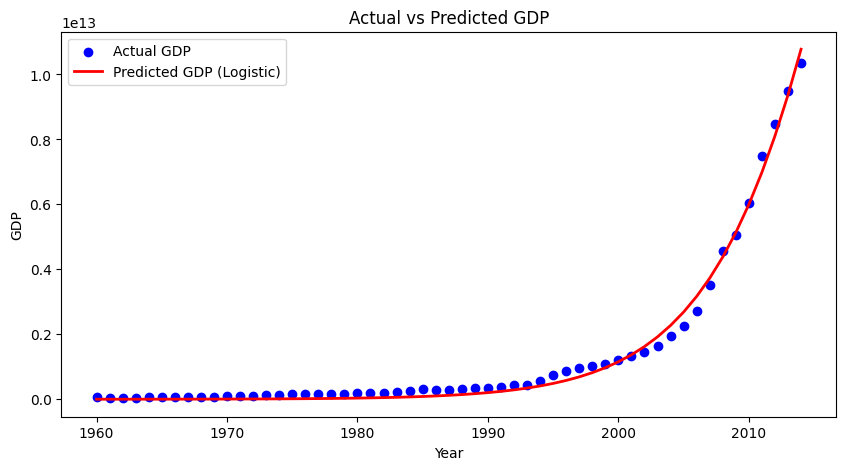

Optimized Parameters: a=0.1752, b=2021.3700, c=4.8272
Final R² Score: 0.9938


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv('china_gdp.csv')

# Check column names
print("Column Names in Dataset:", df.columns)

# Extract year and GDP values
X = df['Year'].values  # Feature (Year)
y = df['Value'].values  # Target (GDP)

# Normalize GDP values for better curve fitting
y_max = np.max(y)
y = y / y_max  # Scale GDP values between 0 and 1

# Visualizing the dataset
plt.figure(figsize=(10,5))
plt.scatter(X, y, color='blue', label='Actual GDP (Normalized)')
plt.xlabel('Year')
plt.ylabel('GDP (Normalized)')
plt.title('China GDP Growth from 1960 to 2014')
plt.legend()
plt.show()

# Define Logistic Growth Function
def logistic_function(x, a, b, c):
    return c / (1 + np.exp(-a * (x - b)))

# Provide initial parameter guesses to help curve_fit()
initial_guesses = [0.1, 2000, 1]

# Curve Fitting using scipy.optimize.curve_fit()
popt, _ = curve_fit(logistic_function, X, y, p0=initial_guesses, maxfev=50000)

# Extract optimized parameters
a_opt, b_opt, c_opt = popt

# Generate predictions
y_pred = logistic_function(X, a_opt, b_opt, c_opt)

# Denormalize predictions
y_pred = y_pred * y_max

# Compute R² Score
r2 = r2_score(df['Value'], y_pred)

# Plot Actual vs Predicted GDP
plt.figure(figsize=(10,5))
plt.scatter(df['Year'], df['Value'], color='blue', label='Actual GDP')
plt.plot(df['Year'], y_pred, color='red', linewidth=2, label='Predicted GDP (Logistic)')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Actual vs Predicted GDP')
plt.legend()
plt.show()

print(f"Optimized Parameters: a={a_opt:.4f}, b={b_opt:.4f}, c={c_opt:.4f}")
print(f"Final R² Score: {r2:.4f}")
